## MLBA Assignment1 
* 繳交格式：hw1_學號.pdf
* 期限：2020-09-24 18:00
* 可以用**任何方法**把程式及數學題合併成一份pdf檔繳交


### **Question 1 (40%)**
**範例：** 繪製今年GOOGLE收盤價

In [1]:
import datetime as dt # 處理時間
import pandas_datareader.data as web # 抓取經濟數據
import matplotlib.pyplot as plt

In [2]:
start = dt.datetime(2020,1,1) # 起始日期
end = dt.date.today() # 結束日期
mystock = ['GOOG','0050.TW'] # 股票

可使用以下兩種方法`get_data_yahoo`及`DataReader`從yahoo獲取股票資料

In [3]:
df1 = web.get_data_yahoo(mystock[0], start, end)
df2 = web.DataReader(mystock[1], 'yahoo', start, end)

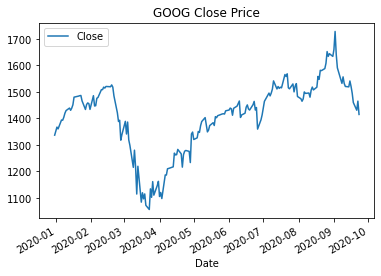

In [4]:
df1[['Close']].plot(title=f'{mystock[0]} Close Price')

* 請以上述例子，建一個繪製股票收盤價的函式`stockplot`

  *  **hint:** `def stockplot(股票, 起始日期, 結束日期)`

  * 輸入日期格式若為字串，可使用`strptime`或其他方式，把字串轉換成時間。  
  `datetime.strptime('年-月-日', '%Y-%m-%d').date()`

  * 可使用`type`檢查變數型態。

 並在一張圖上畫出任意3支股票2019年至今的收盤價(Close)。
 
<br>

* 延續上題，請使用**`for`迴圈**，畫出任意3支股票的開盤價(Open)、收盤價(Close)、最高價(High)、最低價(Low)，共四張圖。


### Answer 1
*以呈現完整資訊為主，圖形美觀不計入分數考量*

* 股票函數 `stockplot` **(5%)**

In [5]:
def stockplot(mystock,start,end,pictype="Close"):
    if type(start)=="sting":
        start=datetime.strptime(start, '%Y-%m-%d').date()
    if type(end)=="sting":
        end=datetime.strptime(start, '%Y-%m-%d').date()
    for i in range(len(mystock)):
        df = web.get_data_yahoo(mystock[i], start, end)
        ax=plt.plot(df[[pictype]],label=f'{mystock[i]} '+pictype+" Price")
        ax=plt.title(f'{mystock} '+pictype+" Price")
        plt.legend()
        
    return None

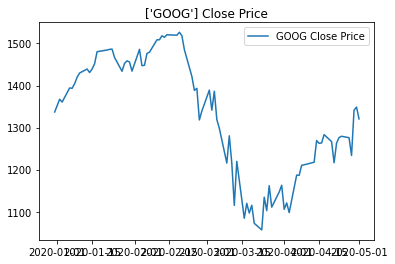

In [6]:
stockplot(['GOOG'],'2020-1-1','2020-5-1')

* 繪圖 多支股票收盤價比較 **(15%)**

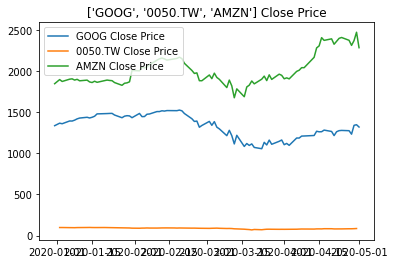

In [7]:
stockplot(['GOOG','0050.TW','AMZN'],'2020-1-1','2020-5-1')

* 迴圈 **(20%)**

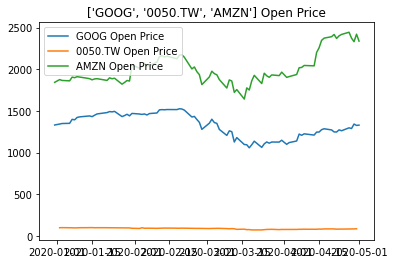

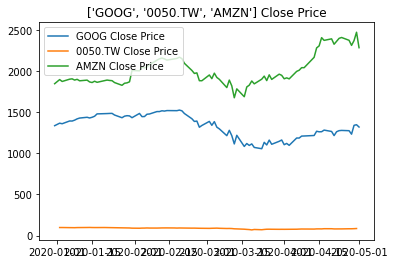

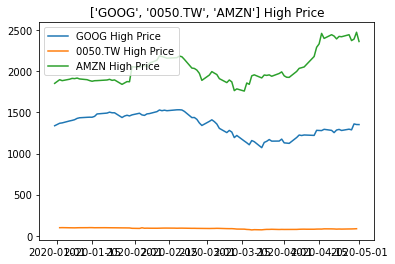

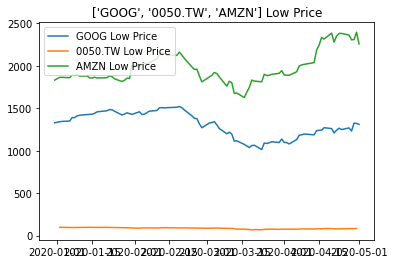

In [8]:
for i in ['Open','Close','High','Low']:
    stockplot(['GOOG','0050.TW','AMZN'],'2020-1-1','2020-5-1',pictype=i)
    plt.show()

### **Question 2 (15%)**
Anny和En上完商管機器學習助教課心很累，肚子很餓，在想要不要去買個紅豆餅當宵夜。
我們決定用感知器來做決定，會受Anny是否想吃、En是否想吃、Sunny是否晚下課，三個因素所影響。

* Decision: 
    是否買紅豆餅當宵夜？

* Inputs:  
    x1 = 1 # Anny想吃  
    x2 = 0 # En不想吃  
    x3 = 1 # Sunny沒有準時下課  

* Weights:  
    w1 = 0.9 # Anny想吃，沒有人可以阻止她  
    w2 = 0.3 # En的意見沒那麼重要  
    w3 = -0.4 # Sunny晚下課，大家都想回家洗洗睡 
     
* Bias: 
  -0.2

請建出一個`snack(x1, x2, x3)`感知器函數，並得出結論。

### Answer 2

* 宵夜感知器 `snack` **(10%)**

In [9]:
import numpy as np

In [10]:
def snack(x1,x2,x3):
    x = np.array([x1, x2,x3])
    w = np.array([0.9, 0.3,-0.4])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

* 是否買宵夜? **(5%)**  
 `snack(1, 0, 1)`

In [11]:
snack(1, 0, 1)

1

### **Question 3 (20%)**
呈上題，建一個兩層的神經網路`snack_network(1, 0.5, 0.8)`  

* 第一層：  
$0.9x_{11}+0.2x_{12}-0.5x_{13}+0.1=a_{11}$  
$0.3x_{11}+0.6x_{12}-0.2x_{13}+0.2=a_{12}$  
以`relu`函數輸出，並輸入下一層。

* 第二層：  
$0.7x_{21}-0.1x_{22}+0.2=a_{21}$  
以`sigmoid`函數輸出。

請問買紅豆餅的機率?

In [12]:
import numpy as np

def relu(x):
    return np.maximum(0,x)
    
def sigmoid(x):
    return 1/(1+np.exp(-x))


### Answer 3

In [13]:
def snack_network(x1,x2,x3):
    
    X = np.array([x1,x2,x3])
    W1 = np.array([[0.9,0.3],[0.2,0.6],[-0.5,-0.2]]) 
    B1 = np.array([0.1, 0.2])
    A1 = np.dot(X, W1) + B1
    Z1 = relu(A1)
    
    W2 = np.array([0.7, -0.1])
    B2 = np.array([0.2])
    A2 = np.dot(Z1, W2) + B2 
    Z2 = sigmoid(A2)
    print(Z2)

In [14]:
snack_network(1, 0.5, 0.8)

[0.65158192]


### **Question 4 (25%)**
數學題，請見 *MLBA HW1's math question.pdf*